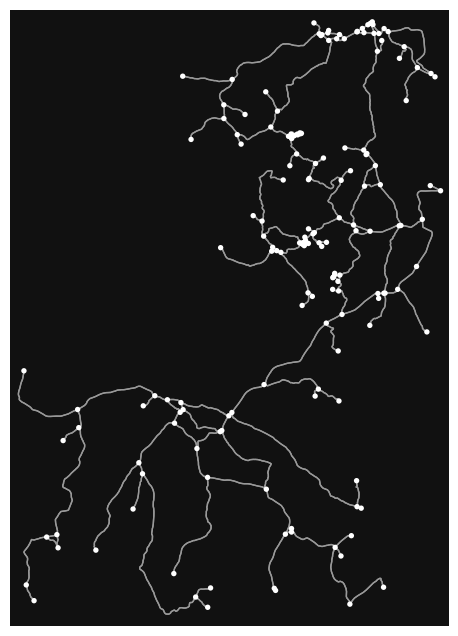

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [11]:
import osmnx as ox
from geopy.distance import geodesic

# Get CMU-Africa coordinates (approximate)
latitude = 1.935111
longitude = 30.158601

# Download the street network within 20 km radius
road = ox.graph_from_point((latitude, longitude), dist=5000, network_type='drive')

ox.plot_graph(road)

Getting the start node (First case: chosen arbitralily)

In [12]:
#Current location node
first_node_id = list(road.nodes)[0]
start_node = road.nodes[first_node_id]
print(f"Attributes for node {first_node_id}:")
print(start_node)

Attributes for node 3384369678:
{'y': 1.9784588, 'x': 30.1895121, 'street_count': 3}


Get the destination node (CMU Africa)

In [13]:
# Find the nearest node to CMU-Africa coordinates
# Destination node
nearest_node = ox.distance.nearest_nodes(road, longitude, latitude)

# Get its attributes (including osmid)
destination_node = road.nodes[nearest_node]

print(f"Nearest node ID: {nearest_node}")
print("Node attributes:")
print(destination_node)

Nearest node ID: 6368500381
Node attributes:
{'y': 1.9230563, 'x': 30.1587099, 'street_count': 3}


Calculating the straight line distance from the start node to the destination node

In [ ]:
# Get coordinates for start node
start_coords = (start_node['y'], start_node['x'])  # (latitude, longitude)

# Get coordinates for destination node
dest_coords = (destination_node['y'], destination_node['x'])  # (latitude, longitude)

# Calculate the geodesic distance
distance = geodesic(start_coords, dest_coords).meters  # or .miles, .meters

print(f"Distance between nodes: {distance:.2f} m")

Distance between nodes: 7019.51 km


Neighbouring nodes of the start node

In [18]:
outgoing_neighbors = list(road.neighbors(first_node_id))
print(f"Outgoing neighbors of node {first_node_id}: {outgoing_neighbors}")

edges_of_node = road.edges(first_node_id, data=True)
print(f"\nEdges from node {first_node_id}:")
for u, v, data in edges_of_node:
    print(f"  Connected to node {v} via edge with attributes: {data}")

Outgoing neighbors of node 3384369678: [6943837966, 7154463780, 6943837935]

Edges from node 3384369678:
  Connected to node 6943837966 via edge with attributes: {'osmid': 1300206437, 'highway': 'unclassified', 'oneway': False, 'reversed': True, 'length': np.float64(10.034862931688611)}
  Connected to node 7154463780 via edge with attributes: {'osmid': 741763588, 'highway': 'unclassified', 'oneway': False, 'reversed': False, 'length': np.float64(120.82971192077137), 'geometry': <LINESTRING (30.19 1.978, 30.19 1.978, 30.19 1.978, 30.19 1.978, 30.19 1.978...>}
  Connected to node 6943837935 via edge with attributes: {'osmid': 1300206437, 'highway': 'unclassified', 'oneway': False, 'reversed': False, 'length': np.float64(243.80348235571867), 'geometry': <LINESTRING (30.19 1.978, 30.189 1.978, 30.188 1.978, 30.188 1.978, 30.188 1...>}


Choosing the best next node